<a href="https://colab.research.google.com/github/RiteshopShrivastava/Python/blob/main/theft_nontheft_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [2]:
df = pd.read_excel('/content/df_model_17jan.xlsx')

In [3]:
pd.set_option('display.max_columns', None)
df.head()

,dc_code,feeder_id,dtr_id,pole_no,acct_id,service_number,old_acct_id,per_name,address1,address2,address3,cell_number,connection_dt,connection_category,premise,cons_stat_flg,per_ctegry,usage1,category_code,group_no,rd_no,bill_type_code,tariff_code,act_sctn_load,act_sctn_load_unit,sctn_load,ctrct_dmnd,max_dmnd,mult_fctr,billing_dmnd,fixed_charges,penal_chrge,phase,meter_no,meter_rent,bill_month,bill_dt,meter_reader_name,reading_type,bill_type,last_mon6_read_dt1,last_mon6_reading,start_reading_date,end_reading_date,start_reading,end_reading,crnt_consumtion,estimated_consumtion,ttl_consumption,final_consumption,gmc_consumption,energy_charges,avg_consumption,load_fctr,power_factr,power_factr_chrge,capacitor_chrge,weldng_chrge,weldng_kp_chrge,duty,extra_chrgs,adjstmnt_chrgs,crnt_bill,prev_pdng_amnt,final_crnt_bill,message1,message2,message3,message4,message5,Meter Manufacturer,Model,Meter Serial No.,Meter Received date,Meter Retired date,amount,bill_crr_flag,is_government,is_employee,pole_latitude,pole_longitude,metering_status,net_meter,Status
0,2304403,2030201010202|Ashok vihar,3044030522|117-B ASHOKA GARDEN HVDS 13,,2443024737,2443024737,4827125111,SHRI JASAN LAL NARWARE,"PLOT NO.246-AASHOKA GARDEN,BH","PLOT NO.246-AASHOKA GARDEN,BH","PLOT NO.246-AASHOKA GARDEN,BH",9.826825e+09,1990-07-24,PERMANENT,URBAN,PERMANENT,GENERAL,Domestic light and fan,,IDG67,7,MIG,LV1.2,0.8,KW,0.8,0.0,0.0,1.0,2114.6,430.100,0.0,SINGLE,HPL62955.-4827125111,10.0,SEP-2019,2019-09-09,CCNB_MIG,NORMAL,MIG,,,,2019-09-14,14022.0,14293.0,271.0,0.0,271.0,271.0,0.0,1437.750,NaN,0.0,0.0,0.0,,0.0,NaN,169.0,0,0.0,2114.6,511.0,3163.0,67.75,,,,,MIG,NaN,HPL62955.-4827125111,2010-07-07,NaN,3210.0,NO,f,f,23.258611,77.432515,METERED,NO,Non_Theft
1,2304403,2030201010202|Ashok vihar,3044030581|BIHIND ARJUN SINGH DASHERA MAIDAN,,2443007273,2443007273,3634865576,PARVEZ,H.NO-15/A DASHMESH NAGAR ASHOKA GARDEN BHOPAL,H.NO-15/A DASHMESH NAGAR ASHOKA GARDEN BHOPAL,H.NO-15/A DASHMESH NAGAR ASHOKA GARDEN BHOPAL,9.713651e+09,2017-10-25,PERMANENT,URBAN,PERMANENT,GENERAL,Domestic light and fan,,IDG67,26,AB,LV1.2,1.0,KW,1.0,0.0,0.0,1.0,136.0,109.000,0.0,SINGLE,NA00086523-3634865576,0.0,AUG-2021,2021-08-17,PMR_FILE,NORMAL,AB,,,,2021-08-16,1922.0,2029.0,107.0,0.0,107.0,107.0,0.0,492.510,NaN,0.0,0.0,0.0,,0.0,NaN,43.0,0,0.0,136.0,191.0,332.0,-21.40,,,,,MIG,NaN,NA00086523-3634865576,2017-10-18,NaN,NaN,NO,f,f,23.259371,77.435832,METERED,NO,Non_Theft
2,2304403,2030201010201|Ashoka garden,3044030304|AMRIT COMPLEX MAIN ROAD,,2443011262,2443011262,8403386839,BHUPINDER KAUR,F.NO-A-01 RAMNIK HOMES 15-B PUNJABI BAG,F.NO-A-01 RAMNIK HOMES 15-B PUNJABI BAG,F.NO-A-01 RAMNIK HOMES 15-B PUNJABI BAG,9.424400e+09,2017-05-16,PERMANENT,URBAN,PERMANENT,GENERAL,Domestic light and fan,,IDG29,55,AB,LV1.2,3.0,KW,3.0,0.0,0.0,1.0,1337.0,301.496,0.0,SINGLE,LNT00020538-8403386839,0.0,JUL-2021,2021-07-16,PMR_FILE,NORMAL,AB,,,,2021-07-12,6505.0,6687.0,182.0,0.0,182.0,182.0,0.0,958.859,NaN,0.0,0.0,0.0,,0.0,NaN,99.0,0,0.0,1337.0,3287.0,4665.0,-15.82,,,,,MIG,NaN,LNT00020538-8403386839,2017-05-12,NaN,4723.0,NO,f,f,23.256234,77.435381,METERED,NO,Non_Theft
3,2304403,2030201010305|Bagh farhat afza,3044030111|JANTA QUATER HAND PUMP D.P.AISH BAG...,,2443016138,2443016138,2536415111,SAMIM / MEHFUJ,"H.NO.23 JAWAHAR COLONY,0","H.NO.23 JAWAHAR COLONY,0","H.NO.23 JAWAHAR COLONY,0",9.981253e+09,2011-05-10,PERMANENT,URBAN,PERMANENT,ST,Domestic light and fan,,IDG19,6,MIG,LV1.2,1.0,KW,1.0,0.0,0.0,1.0,610.0,100.000,0.0,SINGLE,HNDSMTR00097385-2536415111,10.0,APR-2020,2020-04-07,NaN,NaN,MIG,,,,2020-04-14,563.0,563.0,0.0,100.0,100.0,100.0,0.0,450.000,NaN,0.0,0.0,0.0,,0.0,NaN,41.0,0,0.0,610.0,304.0,407.0,9.00,,,,,MIG,NaN,HNDSMTR00097385-2536415111,2018-01-12,NaN,NaN,NO,f,f,23.255361,77.421890,METERED,NO,Non_Theft
4,2304403,2030402010203|SUDAMA,3044030376|SUDAMA NAGAR GURU DWARA MAIN ROAD,,2443003765,2443003765,5992720219,NOOR JAHAN,H.NO.677 GALI NO.9 SUDAMA NAGAR,H.NO.677 GALI NO.9 SUDAMA NAGAR,H.NO.677 GALI NO.9 SUDAMA NAGAR,9.755825e+09,201

In [4]:
df.tail()

,dc_code,feeder_id,dtr_id,pole_no,acct_id,service_number,old_acct_id,per_name,address1,address2,address3,cell_number,connection_dt,connection_category,premise,cons_stat_flg,per_ctegry,usage1,category_code,group_no,rd_no,bill_type_code,tariff_code,act_sctn_load,act_sctn_load_unit,sctn_load,ctrct_dmnd,max_dmnd,mult_fctr,billing_dmnd,fixed_charges,penal_chrge,phase,meter_no,meter_rent,bill_month,bill_dt,meter_reader_name,reading_type,bill_type,last_mon6_read_dt1,last_mon6_reading,start_reading_date,end_reading_date,start_reading,end_reading,crnt_consumtion,estimated_consumtion,ttl_consumption,final_consumption,gmc_consumption,energy_charges,avg_consumption,load_fctr,power_factr,power_factr_chrge,capacitor_chrge,weldng_chrge,weldng_kp_chrge,duty,extra_chrgs,adjstmnt_chrgs,crnt_bill,prev_pdng_amnt,final_crnt_bill,message1,message2,message3,message4,message5,Meter Manufacturer,Model,Meter Serial No.,Meter Received date,Meter Retired date,amount,bill_crr_flag,is_government,is_employee,pole_latitude,pole_longitude,metering_status,net_meter,Status
60423,2304403,NaN,NaN,,2443030731,2443030731,7696073833,SRHI AASHISH SHUKLA,H.NO. 08 SHOP NO. 4 LALA LAJPAT RAI COLONY,H.NO. 08 SHOP NO. 4 LALA LAJPAT RAI COLONY,H.NO. 08 SHOP NO. 4 LALA LAJPAT RAI COLONY,8.817772e+09,2018-08-19,PERMANENT,URBAN,PERMANENT,GENERAL,Shops/Showrooms,,IDG22,1,MIG,LV2.2,2.0,KW,2.0,2.000,0.00,1.0,1035.45,230.0,0.0,SINGLE,NaN,10.0,SEP-2019,2019-08-28,CCNB_MIG,NORMAL,MIG,,,,2019-08-16,694.00,787.00,93.00,0.0,93.0,93.0,0.00,688.2,NaN,0.0,0.00,0.0,,0.00,NaN,84.0,0,0.0,1035.45,6036.0,7146.0,23.25,,,,,NaN,NaN,NaN,NaT,NaN,NaN,NO,f,f,NaN,NaN,METERED,NO,Theft
60424,2304403,2030201010102|24 Shed,3044030030|NEAR REMI IND,,2443031009,2443031009,1702385780,M/S SWASTIK ENTERPRISES,PLOT NO. A-88 IND AREA,PLOT NO. A-88 IND AREA,PLOT NO. A-88 IND AREA,8.734965e+09,2016-04-05,PERMANENT,URBAN,PERMANENT,GENERAL,Industrial establishments,,IDG27,1,MIG,LV4.1A,40.0,HP,40.0,14.920,5.48,1.0,7959.79,3915.0,0.0,THREE,7381723,125.0,SEP-2019,2019-09-06,CCNB_MIG,NORMAL,MIG,,,,2019-08-31,24305.35,24868.41,563.06,0.0,563.0,563.0,-0.06,3628.5,NaN,0.0,0.95,0.0,,-188.47,NaN,339.0,0,0.0,7959.79,0.0,8085.0,140.76,,,,,GENUS,NaN,7381723,2020-11-02,NaN,8085.0,NO,f,f,NaN,NaN,METERED,NO,Theft
60425,2304403,2030201010405|Industrial-5,3044030033|NEAR S.V PUMP,,2443031010,2443031010,3448015111,MS MARUTI SALES CORPORATION PROP SHRI HITESH P...,"14 B SECTER,IND AREA GOVINDP","14 B SECTER,IND AREA GOVINDP","14 B SECTER,IND AREA GOVINDP",8.964943e+09,1974-03-01,PERMANENT,URBAN,PERMANENT,GENERAL,Industrial establishments,,IDG27,5,MIG,LV4.1A,75.0,HP,75.0,20.008,3.76,1.0,9306.80,5445.0,0.0,THREE,MPE17126,125.0,SEP-2019,2019-09-06,CCNB_MIG,NORMAL,MIG,,,,2019-08-31,519506.00,519921.00,415.00,0.0,540.0,540.0,125.00,3480.3,NaN,0.0,0.92,0.0,,-97.25,NaN,250.0,0,0.0,9306.80,0.0,6872.0,103.75,,,,,SECURE,NaN,MPE17126,2021-05-11,NaN,6872.0,NO,f,f,NaN,NaN,METERED,NO,Theft
60426,2304403,2030402010203|SUDAMA,3044030709|BIHARI MOHALLA JHUGGI WALA NEW,,2443031045,2443031045,787415111,ZAFAR KHAN,SHALIMAR CHIKEN SHOP SHOP NO-7,SHALIMAR CHIKEN SHOP SHOP NO-7,SHALIMAR CHIKEN SHOP SHOP NO-7,8.818856e+09,2014-03-13,PERMANENT,URBAN,PERMANENT,GENERAL,School/Education Insti./Polytechnics/ITI,,IDG73,3,MIG,LV2.1,1.0,KW,1.0,0.000,0.00,1.0,881.69,143.8,0.0,SINGLE,NaN,10.0,SEP-2019,2019-09-06,NaN,NaN,MIG,,,,2019-09-07,1920.00,1920.00,0.00,100.0,100.0,100.0,0.00,623.8,NaN,0.0,0.00,0.0,,0.00,NaN,78.0,0,0.0,881.69,36232.0,41035.0,26.09,,,,,NaN,NaN,NaN,NaT,NaN,NaN,NO,f,f,23.247132,77.436375,METERED,NO,Theft
60427,2304403,2030201010401|Industrial-3,3044030027|NEAR ITI,,2443031089,2443031089,7378025111,"THE PRINCIPAL,","MODEL I T I GOVINDPURA,,BHOPA","MODEL I T I GOVINDPURA,,BHOPA","MODEL I T I GOVINDPURA,,BHOPA",NaN,1997-02-22,PERMANENT,URBAN,PERMANENT,GENERAL,School/Education Insti./Polytechnics/ITI,,IDG63,27,MIG,LV2.1,74.6,KW,74.6,11.190,15.36,1.0,17936.78,3308.7,0.0,THREE,MPE26179,125.0,SEP-2019,2019-09-05,CCNB_MIG,NORMAL,MIG,,,,2019-08-31,464295.00

In [5]:
print('Total number of data points are:', len(df))

Total number of data points are: 60428


In [6]:
pd.set_option('display.precision', 4)
df.describe()

,dc_code,acct_id,service_number,old_acct_id,cell_number,rd_no,act_sctn_load,sctn_load,ctrct_dmnd,max_dmnd,mult_fctr,billing_dmnd,fixed_charges,penal_chrge,meter_rent,start_reading,end_reading,crnt_consumtion,estimated_consumtion,ttl_consumption,final_consumption,gmc_consumption,energy_charges,avg_consumption,load_fctr,power_factr,power_factr_chrge,weldng_chrge,weldng_kp_chrge,duty,extra_chrgs,adjstmnt_chrgs,crnt_bill,prev_pdng_amnt,final_crnt_bill,message1,Model,Meter Retired date,amount,pole_latitude,pole_longitude
count,6.0428e+04,6.0428e+04,6.0428e+04,6.0428e+04,4.8646e+04,60428.0000,60428.0000,60428.0000,59401.0000,60428.0000,60428.0000,60428.0000,60428.0000,60428.0000,60428.0000,6.0428e+04,6.0428e+04,60428.0000,60428.0000,60428.0000,60428.0000,60428.0000,60428.0000,0.0,60428.0000,60428.0000,60428.0000,60428.0000,0.0,60428.0000,60428.0,60428.0000,60428.0000,6.0428e+04,6.0428e+04,60428.0000,0.0,0.0,2.8079e+04,52946.0000,52946.0000
mean,2.3395e+06,2.4365e+09,2.4365e+09,4.9873e+09,9.1321e+09,18.2384,3.5298,3.5298,0.9444,1.0805,1.0202,3065.6531,609.9405,51.7554,10.8939,2.3952e+04,2.4044e+04,345.7067,17.0909,393.1329,393.1329,1.2730,2297.9906,NaN,-0.9076,0.1278,4.4814,3.6421,NaN,167.8712,0.0,116.5277,3065.6531,1.6658e+04,2.0433e+04,26.2242,NaN,NaN,6.1162e+03,23.5925,77.4038
std,5.7744e+04,1.0665e+07,1.0665e+07,2.8880e+09,8.5407e+08,17.8918,9.2696,9.2696,5.2057,4.3914,0.8497,10898.6349,1692.5824,458.3523,21.4696,7.1565e+04,7.1941e+04,3755.5286,199.6772,1341.9372,1341.9372,45.7798,8078.5086,NaN,38.6762,0.2969,457.9820,200.6286,NaN,706.8159,0.0,4119.2605,10898.6349,1.1518e+05,1.2373e+05,186.9313,NaN,NaN,3.2774e+04,0.5972,0.0572
min,2.3044e+06,2.4110e+09,2.4110e+09,2.1511e+05,5.2694e+09,1.0000,0.0600,0.0600,0.0000,0.0000,0.0000,-137146.0000,0.0000,0.0000,0.0000,0.0000e+00,0.0000e+00,-251267.0000,0.0000,0.0000,0.0000,-2114.0000,0.0000,NaN,-3624.9600,0.0000,-13665.1200,-8498.8600,NaN,0.0000,0.0,-164196.0000,-137146.0000,-5.3902e+05,-5.4044e+05,-9924.6000,NaN,NaN,1.0000e+00,22.6961,75.5317
25%,2.3044e+06,2.4190e+09,2.4190e+09,2.4430e+09,8.8189e+09,6.0000,0.8438,0.8438,0.0000,0.0000,1.0000,99.0000,100.0000,0.0000,0.0000,2.2058e+03,2.1810e+03,39.0000,0.0000,62.0000,62.0000,0.0000,281.2500,NaN,0.0000,0.0000,0.0000,0.0000,NaN,19.0000,0.0,0.0000,99.0000,-2.0000e+00,9.7000e+01,0.0000,NaN,NaN,1.8400e+02,23.2529,77.4224
50%,2.3044e+06,2.4430e+09,2.4430e+09,4.9420e+09,9.4243e+09,13.0000,1.1800,1.1800,0.0000,0.0000,1.0000,446.5000,103.4000,0.0000,10.0000,5.5720e+03,5.5425e+03,102.0000,0.0000,109.0000,109.0000,0.0000,519.6100,NaN,0.0000,0.0000,0.0000,0.0000,NaN,43.0000,0.0,0.0000,446.5000,0.0000e+00,1.1280e+03,9.0230,NaN,NaN,1.0000e+03,23.2567,77.4291
75%,2.4344e+06,2.4430e+09,2.4430e+09,7.5163e+09,9.8264e+09,23.0000,2.0000,2.0000,0.0000,0.0000,1.0000,1745.2250,368.0000,0.0000,10.0000,1.7328e+04,1.7256e+04,208.0000,0.0000,217.0000,217.0000,0.0000,1178.5500,NaN,0.0000,0.0000,0.0000,0.0000,NaN,104.0000,0.0,0.0000,1745.2250,2.3700e+03,5.2322e+03,21.3000,NaN,NaN,3.0850e+03,23.2691,77.4352
max,2.4344e+06,2.4430e+09,2.4430e+09,9.9999e+09,1.0000e+10,99.0000,150.0000,150.0000,107.0000,120.6400,40.0000,753707.0000,32145.6000,25041.6000,375.0000,3.0912e+06,3.1001e+06,715655.0000,10000.0000,76262.0000,76262.0000,1800.0000,429355.0600,NaN,2.6100,1.0000,43011.7680,14545.9800,NaN,23491.0000,0.0,605119.0000,753707.0000,2.5269e+06,2.6991e+06,6850.8700,NaN,NaN,1.5946e+06,24.6742,77.6825


In [7]:
df['Status'].value_counts()

Theft        30428
Non_Theft    30000
Name: Status, dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60428 entries, 0 to 60427
Data columns (total 84 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   dc_code               60428 non-null  int64         
 1   feeder_id             59969 non-null  object        
 2   dtr_id                59969 non-null  object        
 3   pole_no               60428 non-null  object        
 4   acct_id               60428 non-null  int64         
 5   service_number        60428 non-null  int64         
 6   old_acct_id           60428 non-null  int64         
 7   per_name              60428 non-null  object        
 8   address1              60428 non-null  object        
 9   address2              60428 non-null  object        
 10  address3              60428 non-null  object        
 11  cell_number           48646 non-null  float64       
 12  connection_dt         60428 non-null  datetime64[ns]
 13  connection_categ

In [9]:
#pd.set_option('display.max_columns', None)
df.isnull().sum()

dc_code               0
feeder_id           459
dtr_id              459
pole_no               0
acct_id               0
                   ... 
pole_latitude      7482
pole_longitude     7482
metering_status       0
net_meter             0
Status                0
Length: 84, dtype: int64

In [10]:
df[df['act_sctn_load'] == df['sctn_load']].shape
#All 60428 entries have similar values in both columns, either of one can be dropped

(60428, 84)

In [11]:
df = df.drop(columns=({'sctn_load'}))
df.shape

(60428, 83)

In [12]:
#pd.set_option('display.max_rows', None)
df['act_sctn_load_unit'].value_counts()

KW    55280
HP     5148
Name: act_sctn_load_unit, dtype: int64

In [13]:
df['act_sctn_load']

0         0.8
1         1.0
2         3.0
3         1.0
4         0.5
         ... 
60423     2.0
60424    40.0
60425    75.0
60426     1.0
60427    74.6
Name: act_sctn_load, Length: 60428, dtype: float64

In [14]:
# unit of values in 'act_sctn_load' is different(HP, KW),to be converted all into 'kw'

df['act_sctn_load'] = np.where(df["act_sctn_load_unit"] == "HP", df['act_sctn_load']*.745699, df['act_sctn_load'] )

In [15]:
df['act_sctn_load']

0         0.8000
1         1.0000
2         3.0000
3         1.0000
4         0.5000
          ...   
60423     2.0000
60424    29.8280
60425    55.9274
60426     1.0000
60427    74.6000
Name: act_sctn_load, Length: 60428, dtype: float64

In [16]:
df['extra_chrgs'].mean()

0.0

In [17]:
df['extra_chrgs'].value_counts()

0    60428
Name: extra_chrgs, dtype: int64

In [18]:
# Dropping 'extra_chrgs'since all values are zero
df = df.drop(columns=({'extra_chrgs'}))

In [19]:
df.shape

(60428, 82)

In [20]:
#pd.set_option('display.max_rows', None)
df['adjstmnt_chrgs'].value_counts()

 0.00       51742
-5.00        2357
 200.00       505
-20.00        351
 40.00        326
            ...  
-19.40          1
-19.47          1
-17.64          1
-60.44          1
-1087.00        1
Name: adjstmnt_chrgs, Length: 2415, dtype: int64

In [21]:
df[df['acct_id'] != df['service_number']]
#Both columns have similar values, either of one can be dropped

,dc_code,feeder_id,dtr_id,pole_no,acct_id,service_number,old_acct_id,per_name,address1,address2,address3,cell_number,connection_dt,connection_category,premise,cons_stat_flg,per_ctegry,usage1,category_code,group_no,rd_no,bill_type_code,tariff_code,act_sctn_load,act_sctn_load_unit,ctrct_dmnd,max_dmnd,mult_fctr,billing_dmnd,fixed_charges,penal_chrge,phase,meter_no,meter_rent,bill_month,bill_dt,meter_reader_name,reading_type,bill_type,last_mon6_read_dt1,last_mon6_reading,start_reading_date,end_reading_date,start_reading,end_reading,crnt_consumtion,estimated_consumtion,ttl_consumption,final_consumption,gmc_consumption,energy_charges,avg_consumption,load_fctr,power_factr,power_factr_chrge,capacitor_chrge,weldng_chrge,weldng_kp_chrge,duty,adjstmnt_chrgs,crnt_bill,prev_pdng_amnt,final_crnt_bill,message1,message2,message3,message4,message5,Meter Manufacturer,Model,Meter Serial No.,Meter Received date,Meter Retired date,amount,bill_crr_flag,is_government,is_employee,pole_latitude,pole_longitude,metering_status,net_meter,Status


In [22]:
# 'acct_id' & 'service_number' are similar features, either of one can be dropped
df = df.drop(columns=({'Meter Manufacturer','service_number'}))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60428 entries, 0 to 60427
Data columns (total 80 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   dc_code               60428 non-null  int64         
 1   feeder_id             59969 non-null  object        
 2   dtr_id                59969 non-null  object        
 3   pole_no               60428 non-null  object        
 4   acct_id               60428 non-null  int64         
 5   old_acct_id           60428 non-null  int64         
 6   per_name              60428 non-null  object        
 7   address1              60428 non-null  object        
 8   address2              60428 non-null  object        
 9   address3              60428 non-null  object        
 10  cell_number           48646 non-null  float64       
 11  connection_dt         60428 non-null  datetime64[ns]
 12  connection_category   60428 non-null  object        
 13  premise         

In [23]:
df = df.drop(columns=['pole_no','address2','address3','category_code','last_mon6_read_dt1','last_mon6_reading','start_reading_date',
'avg_consumption','capacitor_chrge','weldng_kp_chrge','message2','message3','message4','message5','Model','Meter Retired date']) 


In [24]:
df.shape

(60428, 64)

In [25]:
df[df['connection_category'] == df['cons_stat_flg']].shape
#Both columns have similar values, either of one can be dropped

(60428, 64)

In [26]:
df = df.drop(columns=({'cons_stat_flg'}))
df.shape

(60428, 63)

In [27]:
df['tariff_code'].value_counts()

LV1.2      47545
LV2.2       7002
LV3.1       2759
LV4.1A      2181
LV1.1        250
LV2.T        241
LV5.1A       201
LV2.1         94
LV1.T         93
LV3.2         55
LV5.1BT        7
Name: tariff_code, dtype: int64

In [28]:
# Dropping 'old_acct_id'(may be of no use)
df = df.drop(columns=({'old_acct_id'}))
df.shape

(60428, 62)

In [29]:
df['usage1'].value_counts()

Domestic light and fan                                          47544
Shops/Showrooms                                                  6714
Public Utility Water Supply Schemes                              2759
Industrial establishments                                        1167
Flour mills                                                       962
Domestic light and fan <100 watt                                  250
Temporary including Multi point at LT for Mela*                   197
Irrigation Pumps of lift irrigation schemes                       189
DISCOM office                                                     110
Construction of own house                                          91
School/Education Insti./Polytechnics/ITI                           90
Public street Lights                                               55
Temporary other under LV2.2                                        42
Workshops(Where any processing or manufacturing takes place)       41
DISCOM substation   

In [30]:
df['ctrct_dmnd'].value_counts()

0.000     56171
7.460       244
15.000      207
20.000      172
11.190      158
          ...  
65.000        1
60.001        1
4.006         1
75.000        1
36.554        1
Name: ctrct_dmnd, Length: 220, dtype: int64

In [31]:
df['max_dmnd'].value_counts()

0.000     52746
1.000      1046
3.000       447
2.000       275
10.000      249
          ...  
8.347         1
5.420         1
6.820         1
27.120        1
5.833         1
Name: max_dmnd, Length: 1255, dtype: int64

In [32]:
df.head()

,dc_code,feeder_id,dtr_id,acct_id,per_name,address1,cell_number,connection_dt,connection_category,premise,per_ctegry,usage1,group_no,rd_no,bill_type_code,tariff_code,act_sctn_load,act_sctn_load_unit,ctrct_dmnd,max_dmnd,mult_fctr,billing_dmnd,fixed_charges,penal_chrge,phase,meter_no,meter_rent,bill_month,bill_dt,meter_reader_name,reading_type,bill_type,end_reading_date,start_reading,end_reading,crnt_consumtion,estimated_consumtion,ttl_consumption,final_consumption,gmc_consumption,energy_charges,load_fctr,power_factr,power_factr_chrge,weldng_chrge,duty,adjstmnt_chrgs,crnt_bill,prev_pdng_amnt,final_crnt_bill,message1,Meter Serial No.,Meter Received date,amount,bill_crr_flag,is_government,is_employee,pole_latitude,pole_longitude,metering_status,net_meter,Status
0,2304403,2030201010202|Ashok vihar,3044030522|117-B ASHOKA GARDEN HVDS 13,2443024737,SHRI JASAN LAL NARWARE,"PLOT NO.246-AASHOKA GARDEN,BH",9.8268e+09,1990-07-24,PERMANENT,URBAN,GENERAL,Domestic light and fan,IDG67,7,MIG,LV1.2,0.8,KW,0.0,0.0,1.0,2114.6,430.100,0.0,SINGLE,HPL62955.-4827125111,10.0,SEP-2019,2019-09-09,CCNB_MIG,NORMAL,MIG,2019-09-14,14022.0,14293.0,271.0,0.0,271.0,271.0,0.0,1437.750,0.0,0.0,0.0,0.0,169.0,0.0,2114.6,511.0,3163.0,67.75,HPL62955.-4827125111,2010-07-07,3210.0,NO,f,f,23.2586,77.4325,METERED,NO,Non_Theft
1,2304403,2030201010202|Ashok vihar,3044030581|BIHIND ARJUN SINGH DASHERA MAIDAN,2443007273,PARVEZ,H.NO-15/A DASHMESH NAGAR ASHOKA GARDEN BHOPAL,9.7137e+09,2017-10-25,PERMANENT,URBAN,GENERAL,Domestic light and fan,IDG67,26,AB,LV1.2,1.0,KW,0.0,0.0,1.0,136.0,109.000,0.0,SINGLE,NA00086523-3634865576,0.0,AUG-2021,2021-08-17,PMR_FILE,NORMAL,AB,2021-08-16,1922.0,2029.0,107.0,0.0,107.0,107.0,0.0,492.510,0.0,0.0,0.0,0.0,43.0,0.0,136.0,191.0,332.0,-21.40,NA00086523-3634865576,2017-10-18,NaN,NO,f,f,23.2594,77.4358,METERED,NO,Non_Theft
2,2304403,2030201010201|Ashoka garden,3044030304|AMRIT COMPLEX MAIN ROAD,2443011262,BHUPINDER KAUR,F.NO-A-01 RAMNIK HOMES 15-B PUNJABI BAG,9.4244e+09,2017-05-16,PERMANENT,URBAN,GENERAL,Domestic light and fan,IDG29,55,AB,LV1.2,3.0,KW,0.0,0.0,1.0,1337.0,301.496,0.0,SINGLE,LNT00020538-8403386839,0.0,JUL-2021,2021-07-16,PMR_FILE,NORMAL,AB,2021-07-12,6505.0,6687.0,182.0,0.0,182.0,182.0,0.0,958.859,0.0,0.0,0.0,0.0,99.0,0.0,1337.0,3287.0,4665.0,-15.82,LNT00020538-8403386839,2017-05-12,4723.0,NO,f,f,23.2562,77.4354,METERED,NO,Non_Theft
3,2304403,2030201010305|Bagh farhat afza,3044030111|JANTA QUATER HAND PUMP D.P.AISH BAG...,2443016138,SAMIM / MEHFUJ,"H.NO.23 JAWAHAR COLONY,0",9.9813e+09,2011-05-10,PERMANENT,URBAN,ST,Domestic light and fan,IDG19,6,MIG,LV1.2,1.0,KW,0.0,0.0,1.0,610.0,100.000,0.0,SINGLE,HNDSMTR00097385-2536415111,10.0,APR-2020,2020-04-07,NaN,NaN,MIG,2020-04-14,563.0,563.0,0.0,100.0,100.0,100.0,0.0,450.000,0.0,0.0,0.0,0.0,41.0,0.0,610.0,304.0,407.0,9.00,HNDSMTR00097385-2536415111,2018-01-12,NaN,NO,f,f,23.2554,77.4219,METERED,NO,Non_Theft
4,2304403,2030402010203|SUDAMA,3044030376|SUDAMA NAGAR GURU DWARA MAIN ROAD,2443003765,NOOR JAHAN,H.NO.677 GALI NO.9 SUDAMA NAGAR,9.7558e+09,2015-12-21,PERMANENT,URBAN,GENERAL,Domestic light and fan,IDG73,8,PFL,LV1.2,0.5,KW,0.0,0.0,1.0,67.0,122.000,0.0,SINGLE,00944662,0.0,JUN-2021,2021-06-20,PMR_FILE,NORMAL,PFL,2021-06-20,242.0,311.0,69.0,0.0,69.0,69.0,0.0,284.970,0.0,0.0,0.0,0.0,26.0,0.0,67.0,2133.0,2227.0,0.69,00944662,2021-02-04,NaN,NO,f,f,23.2496,77.4369,METERED,NO,Non_Theft


In [33]:
df['penal_chrge'].value_counts()

0.00       58920
1836.00       59
1224.00       50
1800.00       42
397.80        36
           ...  
2545.60        1
7907.20        1
3875.20        1
960.00         1
1312.08        1
Name: penal_chrge, Length: 320, dtype: int64

In [34]:
df['net_meter'].value_counts()

NO     60309
YES      119
Name: net_meter, dtype: int64

In [35]:
df['ctrct_dmnd'].value_counts()

0.000     56171
7.460       244
15.000      207
20.000      172
11.190      158
          ...  
65.000        1
60.001        1
4.006         1
75.000        1
36.554        1
Name: ctrct_dmnd, Length: 220, dtype: int64

In [36]:
df['gmc_consumption'].value_counts()

 0.0      57759
 20.0       370
 40.0       125
 60.0        67
 100.0       47
          ...  
-741.0        1
 158.0        1
 365.0        1
 463.0        1
 405.0        1
Name: gmc_consumption, Length: 635, dtype: int64

In [37]:
df['load_fctr'].value_counts()

 0.00       58456
 0.02         146
 0.03         142
 0.05         141
 0.04         129
            ...  
-538.56         1
-1777.81        1
 1.38           1
-1843.53        1
-985.97         1
Name: load_fctr, Length: 179, dtype: int64

In [38]:
df['power_factr'].value_counts()

0.000    50810
0.800     4084
0.880      421
0.810      309
0.890      295
         ...  
0.296        1
0.451        1
0.727        1
0.927        1
0.154        1
Name: power_factr, Length: 527, dtype: int64

In [39]:
df['power_factr_chrge'].value_counts()

 0.000       56751
-180.160        21
-157.640        20
-202.680        12
-191.420        11
             ...  
 1603.316        1
-101.485         1
-137.802         1
-27.296          1
 124.228         1
Name: power_factr_chrge, Length: 3460, dtype: int64

In [40]:
df[df['ttl_consumption']== df['final_consumption']].shape
# All 60428 entries have similar values in both columns, either of one can be dropped

(60428, 62)

In [41]:
# dropping 'ttl_consumption'
df = df.drop(columns=({'ttl_consumption'}))
df.shape

(60428, 61)

In [42]:
df['dc_code'].value_counts()

2304403    44093
2434419    16335
Name: dc_code, dtype: int64

In [43]:
df['per_name'].value_counts()

THE C.M.O. NAGAR PALIKA             486
THE C.M.O NAGAR PALIKA              324
THE C.M.O. NAGAR PALIKA GUNA        254
THE CHIEF MUNICIPAL OFFICER         243
THE CMO NAGAR PALIKA                243
                                   ... 
SHRIRAM SHARMA,                       1
JAYANTI NIGHOJKER                     1
SMT SADHNA DEVI                       1
MEENA MALVIYA WO DINESH  MALVIYA      1
SMT.PARVEEN W/O IRFAN                 1
Name: per_name, Length: 16803, dtype: int64

In [44]:
# dropping 'per_name','feeder_id','dtr_id','acct_id','per_name','address1','cell_number','connection_dt'
df = df.drop(columns=({'dc_code','feeder_id','dtr_id','acct_id','per_name','address1','cell_number','connection_dt','meter_no'}))
df.shape

(60428, 52)

In [45]:
df = df.drop(columns=({'Meter Serial No.','Meter Received date'}))
df.shape

(60428, 50)

In [46]:
df['net_meter'].value_counts()

NO     60309
YES      119
Name: net_meter, dtype: int64

In [47]:
df['metering_status'].value_counts()

METERED    60428
Name: metering_status, dtype: int64

Inference : All the data points have same value,hence column can be deleted

In [48]:
df = df.drop(columns=({'metering_status'}))

In [49]:
df.shape

(60428, 49)

In [50]:
df['per_ctegry'].value_counts()

GENERAL    54045
OBC         2508
SC          1949
ST          1926
Name: per_ctegry, dtype: int64

In [51]:
df = df.drop(columns=({'per_ctegry'}))
df.shape

(60428, 48)

In [52]:
df['connection_category'].value_counts()

PERMANENT    60087
TEMPORARY      341
Name: connection_category, dtype: int64

In [53]:
# Inference : All the data points have same value,hence column can be deleted
df['premise'].value_counts()

URBAN    60428
Name: premise, dtype: int64

In [54]:
df.shape

(60428, 48)

In [55]:
df = df.drop(columns=({'premise'}))
df.shape

(60428, 47)

In [56]:
df = df.drop(columns=({'bill_month','meter_reader_name'}))
df.shape

(60428, 45)

In [57]:
df['phase'].value_counts()

SINGLE    49006
THREE     11422
Name: phase, dtype: int64

In [58]:
df['group_no'].value_counts()

IDG29    6917
IDG19    6662
IDG67    6349
IDG22    4024
IDG21    4021
IDG73    3932
GNA28    2701
IDG87    2362
IDG13    2299
GNA16    2272
GNA25    1945
IDG1     1402
GNA17    1372
GNA21    1278
IDG4     1196
GNA32    1150
IDG63    1054
GNA24     993
IDG26     839
IDG28     791
IDG80     719
GNA33     715
IDG27     587
GNA19     567
GNA23     495
GNA22     481
GNA20     459
GNA31     402
IDG36     393
GNA40     328
GNA27     301
GNA30     275
GNA18     265
IDG3      261
IDG70     144
GNA29     104
GNA26      98
GNA15      72
IDG79      72
IDG2       37
GNA34      27
GNA14      27
IDG64      22
CNB69      10
GNA39       8
Name: group_no, dtype: int64

In [59]:
df['reading_type'].value_counts()

NORMAL    53785
PFL        1532
Name: reading_type, dtype: int64

In [60]:
df.head()

,connection_category,usage1,group_no,rd_no,bill_type_code,tariff_code,act_sctn_load,act_sctn_load_unit,ctrct_dmnd,max_dmnd,mult_fctr,billing_dmnd,fixed_charges,penal_chrge,phase,meter_rent,bill_dt,reading_type,bill_type,end_reading_date,start_reading,end_reading,crnt_consumtion,estimated_consumtion,final_consumption,gmc_consumption,energy_charges,load_fctr,power_factr,power_factr_chrge,weldng_chrge,duty,adjstmnt_chrgs,crnt_bill,prev_pdng_amnt,final_crnt_bill,message1,amount,bill_crr_flag,is_government,is_employee,pole_latitude,pole_longitude,net_meter,Status
0,PERMANENT,Domestic light and fan,IDG67,7,MIG,LV1.2,0.8,KW,0.0,0.0,1.0,2114.6,430.100,0.0,SINGLE,10.0,2019-09-09,NORMAL,MIG,2019-09-14,14022.0,14293.0,271.0,0.0,271.0,0.0,1437.750,0.0,0.0,0.0,0.0,169.0,0.0,2114.6,511.0,3163.0,67.75,3210.0,NO,f,f,23.2586,77.4325,NO,Non_Theft
1,PERMANENT,Domestic light and fan,IDG67,26,AB,LV1.2,1.0,KW,0.0,0.0,1.0,136.0,109.000,0.0,SINGLE,0.0,2021-08-17,NORMAL,AB,2021-08-16,1922.0,2029.0,107.0,0.0,107.0,0.0,492.510,0.0,0.0,0.0,0.0,43.0,0.0,136.0,191.0,332.0,-21.40,NaN,NO,f,f,23.2594,77.4358,NO,Non_Theft
2,PERMANENT,Domestic light and fan,IDG29,55,AB,LV1.2,3.0,KW,0.0,0.0,1.0,1337.0,301.496,0.0,SINGLE,0.0,2021-07-16,NORMAL,AB,2021-07-12,6505.0,6687.0,182.0,0.0,182.0,0.0,958.859,0.0,0.0,0.0,0.0,99.0,0.0,1337.0,3287.0,4665.0,-15.82,4723.0,NO,f,f,23.2562,77.4354,NO,Non_Theft
3,PERMANENT,Domestic light and fan,IDG19,6,MIG,LV1.2,1.0,KW,0.0,0.0,1.0,610.0,100.000,0.0,SINGLE,10.0,2020-04-07,NaN,MIG,2020-04-14,563.0,563.0,0.0,100.0,100.0,0.0,450.000,0.0,0.0,0.0,0.0,41.0,0.0,610.0,304.0,407.0,9.00,NaN,NO,f,f,23.2554,77.4219,NO,Non_Theft
4,PERMANENT,Domestic light and fan,IDG73,8,PFL,LV1.2,0.5,KW,0.0,0.0,1.0,67.0,122.000,0.0,SINGLE,0.0,2021-06-20,NORMAL,PFL,2021-06-20,242.0,311.0,69.0,0.0,69.0,0.0,284.970,0.0,0.0,0.0,0.0,26.0,0.0,67.0,2133.0,2227.0,0.69,NaN,NO,f,f,23.2496,77.4369,NO,Non_Theft


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60428 entries, 0 to 60427
Data columns (total 45 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   connection_category   60428 non-null  object        
 1   usage1                60428 non-null  object        
 2   group_no              60428 non-null  object        
 3   rd_no                 60428 non-null  int64         
 4   bill_type_code        60428 non-null  object        
 5   tariff_code           60428 non-null  object        
 6   act_sctn_load         60428 non-null  float64       
 7   act_sctn_load_unit    60428 non-null  object        
 8   ctrct_dmnd            59401 non-null  float64       
 9   max_dmnd              60428 non-null  float64       
 10  mult_fctr             60428 non-null  float64       
 11  billing_dmnd          60428 non-null  float64       
 12  fixed_charges         60428 non-null  float64       
 13  penal_chrge     

In [62]:
df.shape

(60428, 45)

# **Feature Engineering**

In [63]:
# Splitting bill_dt column into month, year & day

df['bill_dt']= pd.to_datetime(df.bill_dt, format="%y-%b-%d")

df['bill_dt_Year']= df.bill_dt.dt.strftime('%y')
df['bill_dt_Month']= df.bill_dt.dt.strftime('%b')
df['bill_dt_Day']= df.bill_dt.dt.strftime('%d')


In [64]:
df.shape

(60428, 48)

In [65]:
df = df.drop(columns=['bill_dt'])
df.shape

(60428, 47)

In [66]:
df = df.drop(columns=['end_reading_date'])

In [67]:
df.shape


(60428, 46)

In [68]:
df.head()

,connection_category,usage1,group_no,rd_no,bill_type_code,tariff_code,act_sctn_load,act_sctn_load_unit,ctrct_dmnd,max_dmnd,mult_fctr,billing_dmnd,fixed_charges,penal_chrge,phase,meter_rent,reading_type,bill_type,start_reading,end_reading,crnt_consumtion,estimated_consumtion,final_consumption,gmc_consumption,energy_charges,load_fctr,power_factr,power_factr_chrge,weldng_chrge,duty,adjstmnt_chrgs,crnt_bill,prev_pdng_amnt,final_crnt_bill,message1,amount,bill_crr_flag,is_government,is_employee,pole_latitude,pole_longitude,net_meter,Status,bill_dt_Year,bill_dt_Month,bill_dt_Day
0,PERMANENT,Domestic light and fan,IDG67,7,MIG,LV1.2,0.8,KW,0.0,0.0,1.0,2114.6,430.100,0.0,SINGLE,10.0,NORMAL,MIG,14022.0,14293.0,271.0,0.0,271.0,0.0,1437.750,0.0,0.0,0.0,0.0,169.0,0.0,2114.6,511.0,3163.0,67.75,3210.0,NO,f,f,23.2586,77.4325,NO,Non_Theft,19,Sep,09
1,PERMANENT,Domestic light and fan,IDG67,26,AB,LV1.2,1.0,KW,0.0,0.0,1.0,136.0,109.000,0.0,SINGLE,0.0,NORMAL,AB,1922.0,2029.0,107.0,0.0,107.0,0.0,492.510,0.0,0.0,0.0,0.0,43.0,0.0,136.0,191.0,332.0,-21.40,NaN,NO,f,f,23.2594,77.4358,NO,Non_Theft,21,Aug,17
2,PERMANENT,Domestic light and fan,IDG29,55,AB,LV1.2,3.0,KW,0.0,0.0,1.0,1337.0,301.496,0.0,SINGLE,0.0,NORMAL,AB,6505.0,6687.0,182.0,0.0,182.0,0.0,958.859,0.0,0.0,0.0,0.0,99.0,0.0,1337.0,3287.0,4665.0,-15.82,4723.0,NO,f,f,23.2562,77.4354,NO,Non_Theft,21,Jul,16
3,PERMANENT,Domestic light and fan,IDG19,6,MIG,LV1.2,1.0,KW,0.0,0.0,1.0,610.0,100.000,0.0,SINGLE,10.0,NaN,MIG,563.0,563.0,0.0,100.0,100.0,0.0,450.000,0.0,0.0,0.0,0.0,41.0,0.0,610.0,304.0,407.0,9.00,NaN,NO,f,f,23.2554,77.4219,NO,Non_Theft,20,Apr,07
4,PERMANENT,Domestic light and fan,IDG73,8,PFL,LV1.2,0.5,KW,0.0,0.0,1.0,67.0,122.000,0.0,SINGLE,0.0,NORMAL,PFL,242.0,311.0,69.0,0.0,69.0,0.0,284.970,0.0,0.0,0.0,0.0,26.0,0.0,67.0,2133.0,2227.0,0.69,NaN,NO,f,f,23.2496,77.4369,NO,Non_Theft,21,Jun,20


In [69]:
# Assigning numerical values to months in 'bill_dt_Month' column
order = {'bill_dt_Month':{'Jan':1,'Feb':2,'Mar':3,'Apr':4,'May':5,'Jun':6,'Jul':7,'Aug':8,'Sep':9,'Oct':10,'Nov':11,'Dec':12}}

In [70]:
df1 = df
df1 = df1.replace(order)

In [71]:
df1.shape

(60428, 46)

In [72]:
pd.set_option('display.max_columns', None)
df1.head()

,connection_category,usage1,group_no,rd_no,bill_type_code,tariff_code,act_sctn_load,act_sctn_load_unit,ctrct_dmnd,max_dmnd,mult_fctr,billing_dmnd,fixed_charges,penal_chrge,phase,meter_rent,reading_type,bill_type,start_reading,end_reading,crnt_consumtion,estimated_consumtion,final_consumption,gmc_consumption,energy_charges,load_fctr,power_factr,power_factr_chrge,weldng_chrge,duty,adjstmnt_chrgs,crnt_bill,prev_pdng_amnt,final_crnt_bill,message1,amount,bill_crr_flag,is_government,is_employee,pole_latitude,pole_longitude,net_meter,Status,bill_dt_Year,bill_dt_Month,bill_dt_Day
0,PERMANENT,Domestic light and fan,IDG67,7,MIG,LV1.2,0.8,KW,0.0,0.0,1.0,2114.6,430.100,0.0,SINGLE,10.0,NORMAL,MIG,14022.0,14293.0,271.0,0.0,271.0,0.0,1437.750,0.0,0.0,0.0,0.0,169.0,0.0,2114.6,511.0,3163.0,67.75,3210.0,NO,f,f,23.2586,77.4325,NO,Non_Theft,19,9,09
1,PERMANENT,Domestic light and fan,IDG67,26,AB,LV1.2,1.0,KW,0.0,0.0,1.0,136.0,109.000,0.0,SINGLE,0.0,NORMAL,AB,1922.0,2029.0,107.0,0.0,107.0,0.0,492.510,0.0,0.0,0.0,0.0,43.0,0.0,136.0,191.0,332.0,-21.40,NaN,NO,f,f,23.2594,77.4358,NO,Non_Theft,21,8,17
2,PERMANENT,Domestic light and fan,IDG29,55,AB,LV1.2,3.0,KW,0.0,0.0,1.0,1337.0,301.496,0.0,SINGLE,0.0,NORMAL,AB,6505.0,6687.0,182.0,0.0,182.0,0.0,958.859,0.0,0.0,0.0,0.0,99.0,0.0,1337.0,3287.0,4665.0,-15.82,4723.0,NO,f,f,23.2562,77.4354,NO,Non_Theft,21,7,16
3,PERMANENT,Domestic light and fan,IDG19,6,MIG,LV1.2,1.0,KW,0.0,0.0,1.0,610.0,100.000,0.0,SINGLE,10.0,NaN,MIG,563.0,563.0,0.0,100.0,100.0,0.0,450.000,0.0,0.0,0.0,0.0,41.0,0.0,610.0,304.0,407.0,9.00,NaN,NO,f,f,23.2554,77.4219,NO,Non_Theft,20,4,07
4,PERMANENT,Domestic light and fan,IDG73,8,PFL,LV1.2,0.5,KW,0.0,0.0,1.0,67.0,122.000,0.0,SINGLE,0.0,NORMAL,PFL,242.0,311.0,69.0,0.0,69.0,0.0,284.970,0.0,0.0,0.0,0.0,26.0,0.0,67.0,2133.0,2227.0,0.69,NaN,NO,f,f,23.2496,77.4369,NO,Non_Theft,21,6,20


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60428 entries, 0 to 60427
Data columns (total 46 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   connection_category   60428 non-null  object 
 1   usage1                60428 non-null  object 
 2   group_no              60428 non-null  object 
 3   rd_no                 60428 non-null  int64  
 4   bill_type_code        60428 non-null  object 
 5   tariff_code           60428 non-null  object 
 6   act_sctn_load         60428 non-null  float64
 7   act_sctn_load_unit    60428 non-null  object 
 8   ctrct_dmnd            59401 non-null  float64
 9   max_dmnd              60428 non-null  float64
 10  mult_fctr             60428 non-null  float64
 11  billing_dmnd          60428 non-null  float64
 12  fixed_charges         60428 non-null  float64
 13  penal_chrge           60428 non-null  float64
 14  phase                 60428 non-null  object 
 15  meter_rent         

In [74]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60428 entries, 0 to 60427
Data columns (total 46 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   connection_category   60428 non-null  object 
 1   usage1                60428 non-null  object 
 2   group_no              60428 non-null  object 
 3   rd_no                 60428 non-null  int64  
 4   bill_type_code        60428 non-null  object 
 5   tariff_code           60428 non-null  object 
 6   act_sctn_load         60428 non-null  float64
 7   act_sctn_load_unit    60428 non-null  object 
 8   ctrct_dmnd            59401 non-null  float64
 9   max_dmnd              60428 non-null  float64
 10  mult_fctr             60428 non-null  float64
 11  billing_dmnd          60428 non-null  float64
 12  fixed_charges         60428 non-null  float64
 13  penal_chrge           60428 non-null  float64
 14  phase                 60428 non-null  object 
 15  meter_rent         

In [75]:
df1['bill_dt_Day']=pd.to_numeric(df1['bill_dt_Day'])

In [76]:
df1['bill_dt_Day'].dtype

dtype('int64')

# **Preprocessing- Label Encoding independent column**

In [77]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df1['connection_category']= label_encoder.fit_transform(df1['connection_category'])
df1['usage1']= label_encoder.fit_transform(df1['usage1'])
df1['group_no']= label_encoder.fit_transform(df1['group_no'])
df1['bill_type_code']= label_encoder.fit_transform(df1['bill_type_code'])
df1['tariff_code']= label_encoder.fit_transform(df1['tariff_code'])

df1['act_sctn_load_unit']= label_encoder.fit_transform(df1['act_sctn_load_unit'])
df1['phase']= label_encoder.fit_transform(df1['phase'])
df1['reading_type']= label_encoder.fit_transform(df1['reading_type'])
df1['bill_type']= label_encoder.fit_transform(df1['bill_type'])

df1['bill_crr_flag']= label_encoder.fit_transform(df1['bill_crr_flag'])
df1['is_government']= label_encoder.fit_transform(df1['is_government'])
df1['is_employee']= label_encoder.fit_transform(df1['is_employee'])
df1['net_meter']= label_encoder.fit_transform(df1['net_meter'])
df1['bill_dt_Year']= label_encoder.fit_transform(df1['bill_dt_Year'])

In [78]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60428 entries, 0 to 60427
Data columns (total 46 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   connection_category   60428 non-null  int64  
 1   usage1                60428 non-null  int64  
 2   group_no              60428 non-null  int64  
 3   rd_no                 60428 non-null  int64  
 4   bill_type_code        60428 non-null  int64  
 5   tariff_code           60428 non-null  int64  
 6   act_sctn_load         60428 non-null  float64
 7   act_sctn_load_unit    60428 non-null  int64  
 8   ctrct_dmnd            59401 non-null  float64
 9   max_dmnd              60428 non-null  float64
 10  mult_fctr             60428 non-null  float64
 11  billing_dmnd          60428 non-null  float64
 12  fixed_charges         60428 non-null  float64
 13  penal_chrge           60428 non-null  float64
 14  phase                 60428 non-null  int64  
 15  meter_rent         

In [79]:
df1.head()

,connection_category,usage1,group_no,rd_no,bill_type_code,tariff_code,act_sctn_load,act_sctn_load_unit,ctrct_dmnd,max_dmnd,mult_fctr,billing_dmnd,fixed_charges,penal_chrge,phase,meter_rent,reading_type,bill_type,start_reading,end_reading,crnt_consumtion,estimated_consumtion,final_consumption,gmc_consumption,energy_charges,load_fctr,power_factr,power_factr_chrge,weldng_chrge,duty,adjstmnt_chrgs,crnt_bill,prev_pdng_amnt,final_crnt_bill,message1,amount,bill_crr_flag,is_government,is_employee,pole_latitude,pole_longitude,net_meter,Status,bill_dt_Year,bill_dt_Month,bill_dt_Day
0,0,12,39,7,3,1,0.8,1,0.0,0.0,1.0,2114.6,430.100,0.0,0,10.0,0,3,14022.0,14293.0,271.0,0.0,271.0,0.0,1437.750,0.0,0.0,0.0,0.0,169.0,0.0,2114.6,511.0,3163.0,67.75,3210.0,0,0,0,23.2586,77.4325,0,Non_Theft,0,9,9
1,0,12,39,26,0,1,1.0,1,0.0,0.0,1.0,136.0,109.000,0.0,0,0.0,0,0,1922.0,2029.0,107.0,0.0,107.0,0.0,492.510,0.0,0.0,0.0,0.0,43.0,0.0,136.0,191.0,332.0,-21.40,NaN,0,0,0,23.2594,77.4358,0,Non_Theft,2,8,17
2,0,12,33,55,0,1,3.0,1,0.0,0.0,1.0,1337.0,301.496,0.0,0,0.0,0,0,6505.0,6687.0,182.0,0.0,182.0,0.0,958.859,0.0,0.0,0.0,0.0,99.0,0.0,1337.0,3287.0,4665.0,-15.82,4723.0,0,0,0,23.2562,77.4354,0,Non_Theft,2,7,16
3,0,12,26,6,3,1,1.0,1,0.0,0.0,1.0,610.0,100.000,0.0,0,10.0,2,3,563.0,563.0,0.0,100.0,100.0,0.0,450.000,0.0,0.0,0.0,0.0,41.0,0.0,610.0,304.0,407.0,9.00,NaN,0,0,0,23.2554,77.4219,0,Non_Theft,1,4,7
4,0,12,41,8,4,1,0.5,1,0.0,0.0,1.0,67.0,122.000,0.0,0,0.0,0,4,242.0,311.0,69.0,0.0,69.0,0.0,284.970,0.0,0.0,0.0,0.0,26.0,0.0,67.0,2133.0,2227.0,0.69,NaN,0,0,0,23.2496,77.4369,0,Non_Theft,2,6,20


In [80]:
df1.tail()

,connection_category,usage1,group_no,rd_no,bill_type_code,tariff_code,act_sctn_load,act_sctn_load_unit,ctrct_dmnd,max_dmnd,mult_fctr,billing_dmnd,fixed_charges,penal_chrge,phase,meter_rent,reading_type,bill_type,start_reading,end_reading,crnt_consumtion,estimated_consumtion,final_consumption,gmc_consumption,energy_charges,load_fctr,power_factr,power_factr_chrge,weldng_chrge,duty,adjstmnt_chrgs,crnt_bill,prev_pdng_amnt,final_crnt_bill,message1,amount,bill_crr_flag,is_government,is_employee,pole_latitude,pole_longitude,net_meter,Status,bill_dt_Year,bill_dt_Month,bill_dt_Day
60423,0,33,29,1,3,4,2.0000,1,2.000,0.00,1.0,1035.45,230.0,0.0,0,10.0,0,3,694.00,787.00,93.00,0.0,93.0,0.00,688.2,0.0,0.00,0.0,0.00,84.0,0.0,1035.45,6036.0,7146.0,23.25,NaN,0,0,0,NaN,NaN,0,Theft,0,8,28
60424,0,21,31,1,3,8,29.8280,0,14.920,5.48,1.0,7959.79,3915.0,0.0,1,125.0,0,3,24305.35,24868.41,563.06,0.0,563.0,-0.06,3628.5,0.0,0.95,0.0,-188.47,339.0,0.0,7959.79,0.0,8085.0,140.76,8085.0,0,0,0,NaN,NaN,0,Theft,0,9,6
60425,0,21,31,5,3,8,55.9274,0,20.008,3.76,1.0,9306.80,5445.0,0.0,1,125.0,0,3,519506.00,519921.00,415.00,0.0,540.0,125.00,3480.3,0.0,0.92,0.0,-97.25,250.0,0.0,9306.80,0.0,6872.0,103.75,6872.0,0,0,0,NaN,NaN,0,Theft,0,9,6
60426,0,32,41,3,3,3,1.0000,1,0.000,0.00,1.0,881.69,143.8,0.0,0,10.0,2,3,1920.00,1920.00,0.00,100.0,100.0,0.00,623.8,0.0,0.00,0.0,0.00,78.0,0.0,881.69,36232.0,41035.0,26.09,NaN,0,0,0,23.2471,77.4364,0,Theft,0,9,6
60427,0,32,37,27,3,3,74.6000,1,11.190,15.36,1.0,17936.78,3308.7,0.0,1,125.0,0,3,464295.00,466015.00,1720.00,0.0,1720.0,0.00,10658.4,0.0,0.47,0.0,1108.84,1644.0,0.0,17936.78,44023.0,62108.0,430.01,NaN,0,1,0,NaN,NaN,0,Theft,0,9,5


**Imputing null values with '0'**

In [81]:
df1 = df1.fillna(0)

In [82]:
df1.head()

,connection_category,usage1,group_no,rd_no,bill_type_code,tariff_code,act_sctn_load,act_sctn_load_unit,ctrct_dmnd,max_dmnd,mult_fctr,billing_dmnd,fixed_charges,penal_chrge,phase,meter_rent,reading_type,bill_type,start_reading,end_reading,crnt_consumtion,estimated_consumtion,final_consumption,gmc_consumption,energy_charges,load_fctr,power_factr,power_factr_chrge,weldng_chrge,duty,adjstmnt_chrgs,crnt_bill,prev_pdng_amnt,final_crnt_bill,message1,amount,bill_crr_flag,is_government,is_employee,pole_latitude,pole_longitude,net_meter,Status,bill_dt_Year,bill_dt_Month,bill_dt_Day
0,0,12,39,7,3,1,0.8,1,0.0,0.0,1.0,2114.6,430.100,0.0,0,10.0,0,3,14022.0,14293.0,271.0,0.0,271.0,0.0,1437.750,0.0,0.0,0.0,0.0,169.0,0.0,2114.6,511.0,3163.0,67.75,3210.0,0,0,0,23.2586,77.4325,0,Non_Theft,0,9,9
1,0,12,39,26,0,1,1.0,1,0.0,0.0,1.0,136.0,109.000,0.0,0,0.0,0,0,1922.0,2029.0,107.0,0.0,107.0,0.0,492.510,0.0,0.0,0.0,0.0,43.0,0.0,136.0,191.0,332.0,-21.40,0.0,0,0,0,23.2594,77.4358,0,Non_Theft,2,8,17
2,0,12,33,55,0,1,3.0,1,0.0,0.0,1.0,1337.0,301.496,0.0,0,0.0,0,0,6505.0,6687.0,182.0,0.0,182.0,0.0,958.859,0.0,0.0,0.0,0.0,99.0,0.0,1337.0,3287.0,4665.0,-15.82,4723.0,0,0,0,23.2562,77.4354,0,Non_Theft,2,7,16
3,0,12,26,6,3,1,1.0,1,0.0,0.0,1.0,610.0,100.000,0.0,0,10.0,2,3,563.0,563.0,0.0,100.0,100.0,0.0,450.000,0.0,0.0,0.0,0.0,41.0,0.0,610.0,304.0,407.0,9.00,0.0,0,0,0,23.2554,77.4219,0,Non_Theft,1,4,7
4,0,12,41,8,4,1,0.5,1,0.0,0.0,1.0,67.0,122.000,0.0,0,0.0,0,4,242.0,311.0,69.0,0.0,69.0,0.0,284.970,0.0,0.0,0.0,0.0,26.0,0.0,67.0,2133.0,2227.0,0.69,0.0,0,0,0,23.2496,77.4369,0,Non_Theft,2,6,20


In [83]:
df1.tail()

,connection_category,usage1,group_no,rd_no,bill_type_code,tariff_code,act_sctn_load,act_sctn_load_unit,ctrct_dmnd,max_dmnd,mult_fctr,billing_dmnd,fixed_charges,penal_chrge,phase,meter_rent,reading_type,bill_type,start_reading,end_reading,crnt_consumtion,estimated_consumtion,final_consumption,gmc_consumption,energy_charges,load_fctr,power_factr,power_factr_chrge,weldng_chrge,duty,adjstmnt_chrgs,crnt_bill,prev_pdng_amnt,final_crnt_bill,message1,amount,bill_crr_flag,is_government,is_employee,pole_latitude,pole_longitude,net_meter,Status,bill_dt_Year,bill_dt_Month,bill_dt_Day
60423,0,33,29,1,3,4,2.0000,1,2.000,0.00,1.0,1035.45,230.0,0.0,0,10.0,0,3,694.00,787.00,93.00,0.0,93.0,0.00,688.2,0.0,0.00,0.0,0.00,84.0,0.0,1035.45,6036.0,7146.0,23.25,0.0,0,0,0,0.0000,0.0000,0,Theft,0,8,28
60424,0,21,31,1,3,8,29.8280,0,14.920,5.48,1.0,7959.79,3915.0,0.0,1,125.0,0,3,24305.35,24868.41,563.06,0.0,563.0,-0.06,3628.5,0.0,0.95,0.0,-188.47,339.0,0.0,7959.79,0.0,8085.0,140.76,8085.0,0,0,0,0.0000,0.0000,0,Theft,0,9,6
60425,0,21,31,5,3,8,55.9274,0,20.008,3.76,1.0,9306.80,5445.0,0.0,1,125.0,0,3,519506.00,519921.00,415.00,0.0,540.0,125.00,3480.3,0.0,0.92,0.0,-97.25,250.0,0.0,9306.80,0.0,6872.0,103.75,6872.0,0,0,0,0.0000,0.0000,0,Theft,0,9,6
60426,0,32,41,3,3,3,1.0000,1,0.000,0.00,1.0,881.69,143.8,0.0,0,10.0,2,3,1920.00,1920.00,0.00,100.0,100.0,0.00,623.8,0.0,0.00,0.0,0.00,78.0,0.0,881.69,36232.0,41035.0,26.09,0.0,0,0,0,23.2471,77.4364,0,Theft,0,9,6
60427,0,32,37,27,3,3,74.6000,1,11.190,15.36,1.0,17936.78,3308.7,0.0,1,125.0,0,3,464295.00,466015.00,1720.00,0.0,1720.0,0.00,10658.4,0.0,0.47,0.0,1108.84,1644.0,0.0,17936.78,44023.0,62108.0,430.01,0.0,0,1,0,0.0000,0.0000,0,Theft,0,9,5


# **Preprocessing -Label encoding target column**

In [84]:
df1['Status']= label_encoder.fit_transform(df1['Status'])

In [85]:
df1.head()

,connection_category,usage1,group_no,rd_no,bill_type_code,tariff_code,act_sctn_load,act_sctn_load_unit,ctrct_dmnd,max_dmnd,mult_fctr,billing_dmnd,fixed_charges,penal_chrge,phase,meter_rent,reading_type,bill_type,start_reading,end_reading,crnt_consumtion,estimated_consumtion,final_consumption,gmc_consumption,energy_charges,load_fctr,power_factr,power_factr_chrge,weldng_chrge,duty,adjstmnt_chrgs,crnt_bill,prev_pdng_amnt,final_crnt_bill,message1,amount,bill_crr_flag,is_government,is_employee,pole_latitude,pole_longitude,net_meter,Status,bill_dt_Year,bill_dt_Month,bill_dt_Day
0,0,12,39,7,3,1,0.8,1,0.0,0.0,1.0,2114.6,430.100,0.0,0,10.0,0,3,14022.0,14293.0,271.0,0.0,271.0,0.0,1437.750,0.0,0.0,0.0,0.0,169.0,0.0,2114.6,511.0,3163.0,67.75,3210.0,0,0,0,23.2586,77.4325,0,0,0,9,9
1,0,12,39,26,0,1,1.0,1,0.0,0.0,1.0,136.0,109.000,0.0,0,0.0,0,0,1922.0,2029.0,107.0,0.0,107.0,0.0,492.510,0.0,0.0,0.0,0.0,43.0,0.0,136.0,191.0,332.0,-21.40,0.0,0,0,0,23.2594,77.4358,0,0,2,8,17
2,0,12,33,55,0,1,3.0,1,0.0,0.0,1.0,1337.0,301.496,0.0,0,0.0,0,0,6505.0,6687.0,182.0,0.0,182.0,0.0,958.859,0.0,0.0,0.0,0.0,99.0,0.0,1337.0,3287.0,4665.0,-15.82,4723.0,0,0,0,23.2562,77.4354,0,0,2,7,16
3,0,12,26,6,3,1,1.0,1,0.0,0.0,1.0,610.0,100.000,0.0,0,10.0,2,3,563.0,563.0,0.0,100.0,100.0,0.0,450.000,0.0,0.0,0.0,0.0,41.0,0.0,610.0,304.0,407.0,9.00,0.0,0,0,0,23.2554,77.4219,0,0,1,4,7
4,0,12,41,8,4,1,0.5,1,0.0,0.0,1.0,67.0,122.000,0.0,0,0.0,0,4,242.0,311.0,69.0,0.0,69.0,0.0,284.970,0.0,0.0,0.0,0.0,26.0,0.0,67.0,2133.0,2227.0,0.69,0.0,0,0,0,23.2496,77.4369,0,0,2,6,20


In [86]:
df1.tail()

,connection_category,usage1,group_no,rd_no,bill_type_code,tariff_code,act_sctn_load,act_sctn_load_unit,ctrct_dmnd,max_dmnd,mult_fctr,billing_dmnd,fixed_charges,penal_chrge,phase,meter_rent,reading_type,bill_type,start_reading,end_reading,crnt_consumtion,estimated_consumtion,final_consumption,gmc_consumption,energy_charges,load_fctr,power_factr,power_factr_chrge,weldng_chrge,duty,adjstmnt_chrgs,crnt_bill,prev_pdng_amnt,final_crnt_bill,message1,amount,bill_crr_flag,is_government,is_employee,pole_latitude,pole_longitude,net_meter,Status,bill_dt_Year,bill_dt_Month,bill_dt_Day
60423,0,33,29,1,3,4,2.0000,1,2.000,0.00,1.0,1035.45,230.0,0.0,0,10.0,0,3,694.00,787.00,93.00,0.0,93.0,0.00,688.2,0.0,0.00,0.0,0.00,84.0,0.0,1035.45,6036.0,7146.0,23.25,0.0,0,0,0,0.0000,0.0000,0,1,0,8,28
60424,0,21,31,1,3,8,29.8280,0,14.920,5.48,1.0,7959.79,3915.0,0.0,1,125.0,0,3,24305.35,24868.41,563.06,0.0,563.0,-0.06,3628.5,0.0,0.95,0.0,-188.47,339.0,0.0,7959.79,0.0,8085.0,140.76,8085.0,0,0,0,0.0000,0.0000,0,1,0,9,6
60425,0,21,31,5,3,8,55.9274,0,20.008,3.76,1.0,9306.80,5445.0,0.0,1,125.0,0,3,519506.00,519921.00,415.00,0.0,540.0,125.00,3480.3,0.0,0.92,0.0,-97.25,250.0,0.0,9306.80,0.0,6872.0,103.75,6872.0,0,0,0,0.0000,0.0000,0,1,0,9,6
60426,0,32,41,3,3,3,1.0000,1,0.000,0.00,1.0,881.69,143.8,0.0,0,10.0,2,3,1920.00,1920.00,0.00,100.0,100.0,0.00,623.8,0.0,0.00,0.0,0.00,78.0,0.0,881.69,36232.0,41035.0,26.09,0.0,0,0,0,23.2471,77.4364,0,1,0,9,6
60427,0,32,37,27,3,3,74.6000,1,11.190,15.36,1.0,17936.78,3308.7,0.0,1,125.0,0,3,464295.00,466015.00,1720.00,0.0,1720.0,0.00,10658.4,0.0,0.47,0.0,1108.84,1644.0,0.0,17936.78,44023.0,62108.0,430.01,0.0,0,1,0,0.0000,0.0000,0,1,0,9,5


In [87]:
df1.corr()

,connection_category,usage1,group_no,rd_no,bill_type_code,tariff_code,act_sctn_load,act_sctn_load_unit,ctrct_dmnd,max_dmnd,mult_fctr,billing_dmnd,fixed_charges,penal_chrge,phase,meter_rent,reading_type,bill_type,start_reading,end_reading,crnt_consumtion,estimated_consumtion,final_consumption,gmc_consumption,energy_charges,load_fctr,power_factr,power_factr_chrge,weldng_chrge,duty,adjstmnt_chrgs,crnt_bill,prev_pdng_amnt,final_crnt_bill,message1,amount,bill_crr_flag,is_government,is_employee,pole_latitude,pole_longitude,net_meter,Status,bill_dt_Year,bill_dt_Month,bill_dt_Day
connection_category,1.0000,0.1373,0.0134,-0.0445,0.0216,0.0967,0.0184,0.0174,-0.0090,0.0275,-0.0018,0.0238,0.0253,-0.0084,0.0731,0.0183,-0.0152,0.0216,0.0051,0.0048,0.0019,-0.0062,0.0035,0.0129,0.0165,0.0018,0.1103,0.0092,0.0009,0.0401,0.0097,0.0238,-0.0079,-0.0056,0.0012,0.0096,0.0146,-0.0169,-0.0025,-0.1999,-0.2004,-0.0033,0.0249,0.0077,-0.0024,-0.0293
usage1,0.1373,1.0000,-0.0569,-0.0400,0.0249,0.7341,0.2578,-0.3475,0.1715,0.3115,0.0487,0.2788,0.2801,0.1804,0.4750,0.2065,-0.1195,0.0249,0.2676,0.2691,0.0904,0.0215,0.2691,0.0283,0.2816,-0.0447,0.7070,-0.0152,0.0159,0.1873,0.0134,0.2788,0.2004,0.2197,0.1199,0.1418,0.0012,0.3776,-0.0129,-0.4301,-0.4292,0.0231,0.0228,0.0061,-0.0054,-0.1278
group_no,0.0134,-0.0569,1.0000,0.1504,0.0986,-0.0380,0.0595,0.0969,0.1104,-0.0122,-0.0029,-0.0416,0.0396,-0.0843,-0.0232,0.0680,0.0351,0.0986,0.0068,0.0057,-0.0245,-0.0464,-0.0744,0.0168,-0.0643,-0.0035,-0.0692,-0.0391,-0.0281,0.0423,-0.0071,-0.0416,-0.1180,-0.1182,-0.0231,-0.0220,-0.0240,-0.2027,0.0156,-0.0154,0.0438,0.0260,-0.5474,-0.0311,0.0259,-0.1095
rd_no,-0.0445,-0.0400,0.1504,1.0000,-0.0011,-0.0426,-0.0482,-0.0080,-0.0439,-0.0177,-0.0033,-0.0070,-0.0187,0.0159,-0.0330,-0.0229,-0.0099,-0.0011,0.0165,0.0160,0.0043,-0.0066,0.0020,-0.0075,-0.0043,0.0090,-0.0405,0.0116,0.0077,-0.0338,-0.0030,-0.0070,0.0335,0.0320,0.0010,-0.0013,-0.0079,0.0469,-0.0101,0.0023,0.0167,-0.0106,-0.0747,-0.0275,0.0036,-0.0307
bill_type_code,0.0216,0.0249,0.0986,-0.0011,1.0000,0.0067,-0.0059,0.0453,0.0088,-0.0627,-0.0056,-0.0724,-0.0549,-0.0807,-0.0352,0.1105,0.0185,1.0000,-0.0549,-0.0558,-0.0432,0.0080,-0.0969,0.1374,-0.0930,-0.0234,-0.0499,0.0175,0.0180,-0.0693,-0.0144,-0.0724,-0.0448,-0.0498,0.0517,-0.0498,-0.1067,-0.0881,-0.0046,0.0259,0.0327,0.0004,-0.0960,-0.3708,-0.0496,-0.0431
tariff_code,0.0967,0.7341,-0.0380,-0.0426,0.0067,1.0000,0.5689,-0.8291,0.4728,0.5946,0.0322,0.4377,0.5788,0.2487,0.6861,0.4885,-0.1153,0.0067,0.4640,0.4649,0.1425,0.0768,0.4128,0.0689,0.4151,-0.0360,0.8291,0.0654,0.0584,0.2212,0.0415,0.4377,0.2673,0.2990,0.2001,0.2140,0.0239,0.4835,-0.0140,-0.6946,-0.6957,0.0208,0.0641,0.0128,-0.0108,-0.1966
act_sctn_load,0.0184,0.2578,0.0595,-0.0482,-0.0059,0.5689,1.0000,-0.5150,0.8568,0.7356,0.0794,0.5000,0.8271,0.1226,0.5269,0.5278,-0.0841,-0.0059,0.6503,0.6489,0.1349,0.0137,0.4076,0.0870,0.4387,-0.0875,0.5022,-0.0808,-0.0190,0.4657,0.0307,0.5000,0.1121,0.1535,0.2114,0.2269,-0.0064,0.1548,-0.0053,-0.5511,-0.5548,0.0815,0.0313,0.0092,-0.0088,-0.1536
act_sctn_load_unit,0.0174,-0.3475,0.0969,-0.0080,0.0453,-0.8291,-0.5150,1.0000,-0.3988,-0.5998,-0.0028,-0.4508,-0.5716,-0.3066,-0.6313,-0.4316,0.0754,0.0453,-0.4868,-0.4888,-0.1626,-0.0902,-0.4616,-0.0557,-0.4390,0.0087,-0.6501,-0.1492,-0.0998,-0.0881,-0.0424,-0.4508,-0.3834,-0.4129,-0.2171,-0.2246,-0.0439,-0.6872,0.0102,0.7160,0.7184,-0.0052,-0.1406,-0.0184,0.0163,0.1940
ctrct_dmnd,-0.0090,0.1715,0.1104,-0.0439,0.0088,0.4728,0.8568,-0.3988,1.0000,0.7284,0.1023,0.4588,0.8314,0.0654,0.3706,0.5172,-0.0572,0.0088,0.5232,0.5204,0.1199,-0.0005,0.3476,0.0579,0.3872,-0.1060,0.4085,-0.1246,-0.0423,0.5119,0.0236,0.4588,-0.0079,0.0337,0.1891,0.2120,-0.0123,-0.0308,-0.0060,-0.4423,-0.4437,0.0761,-0.0034,0.0035,-0.0057,-0.1257
max_dmnd,0.0275,0.3115,-0.0122,-0.0177,-0.0627,0.5946,0.7356,-0.5998,0.7284,1.0000,0.1234,0.6594,0.8659,0.4005,0.5005,0.4263,-0.0709,-0.0627,0.6104,0.6142,0.2029,0.0350,0.5930,-0.0619,0.6183,-0.1120,0.5645,-0.0811,-0.0179,0.5

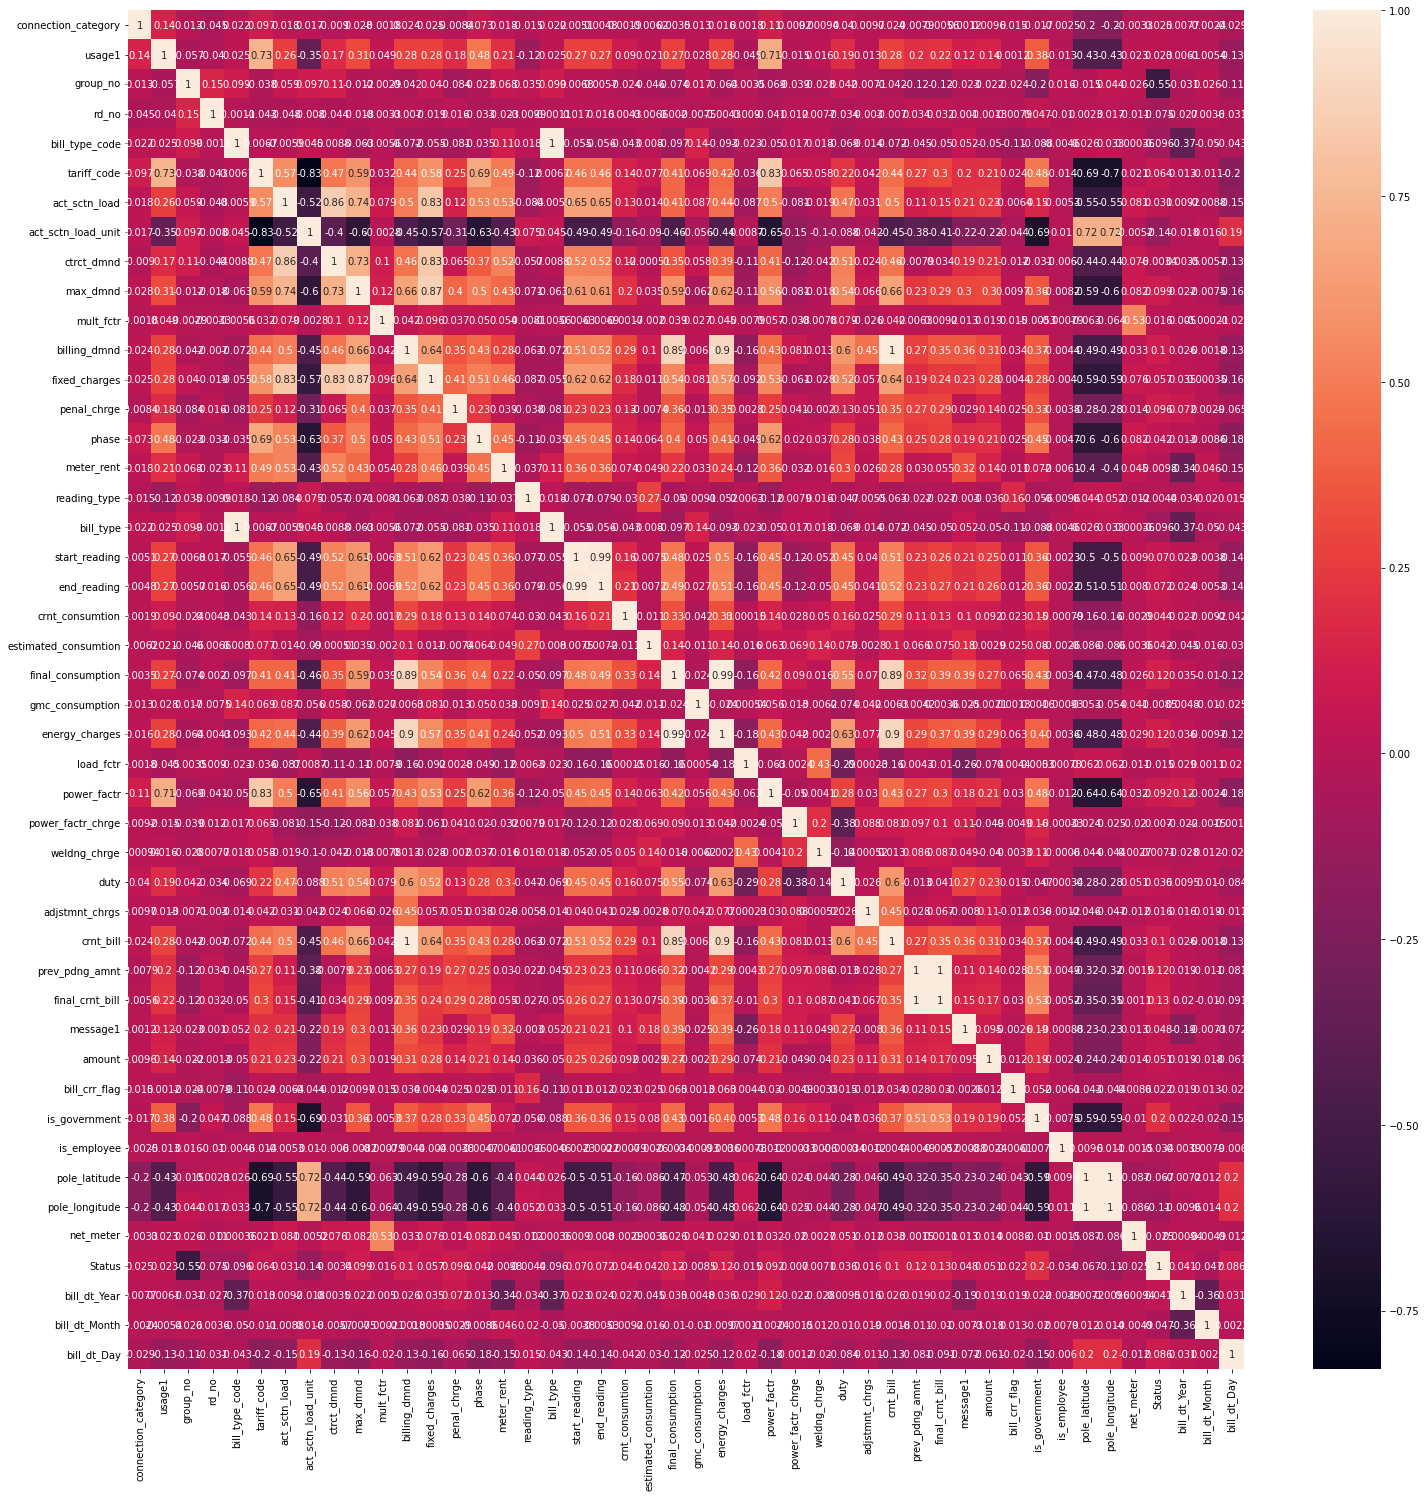

In [88]:
import matplotlib.pyplot as plt

plt.figure(figsize=(25,25))
sns.heatmap(df1.corr(),annot=True)
plt.show()

In [89]:
df1.shape

(60428, 46)

In [90]:
# 'billing_dmnd' & 'crnt_bill' are same, 'billing_dmnd' can be dropped
# 'bill_type_code' & 'bill_type' 
df1 = df1.drop(columns=['billing_dmnd','bill_type_code'])
df1.shape

(60428, 44)

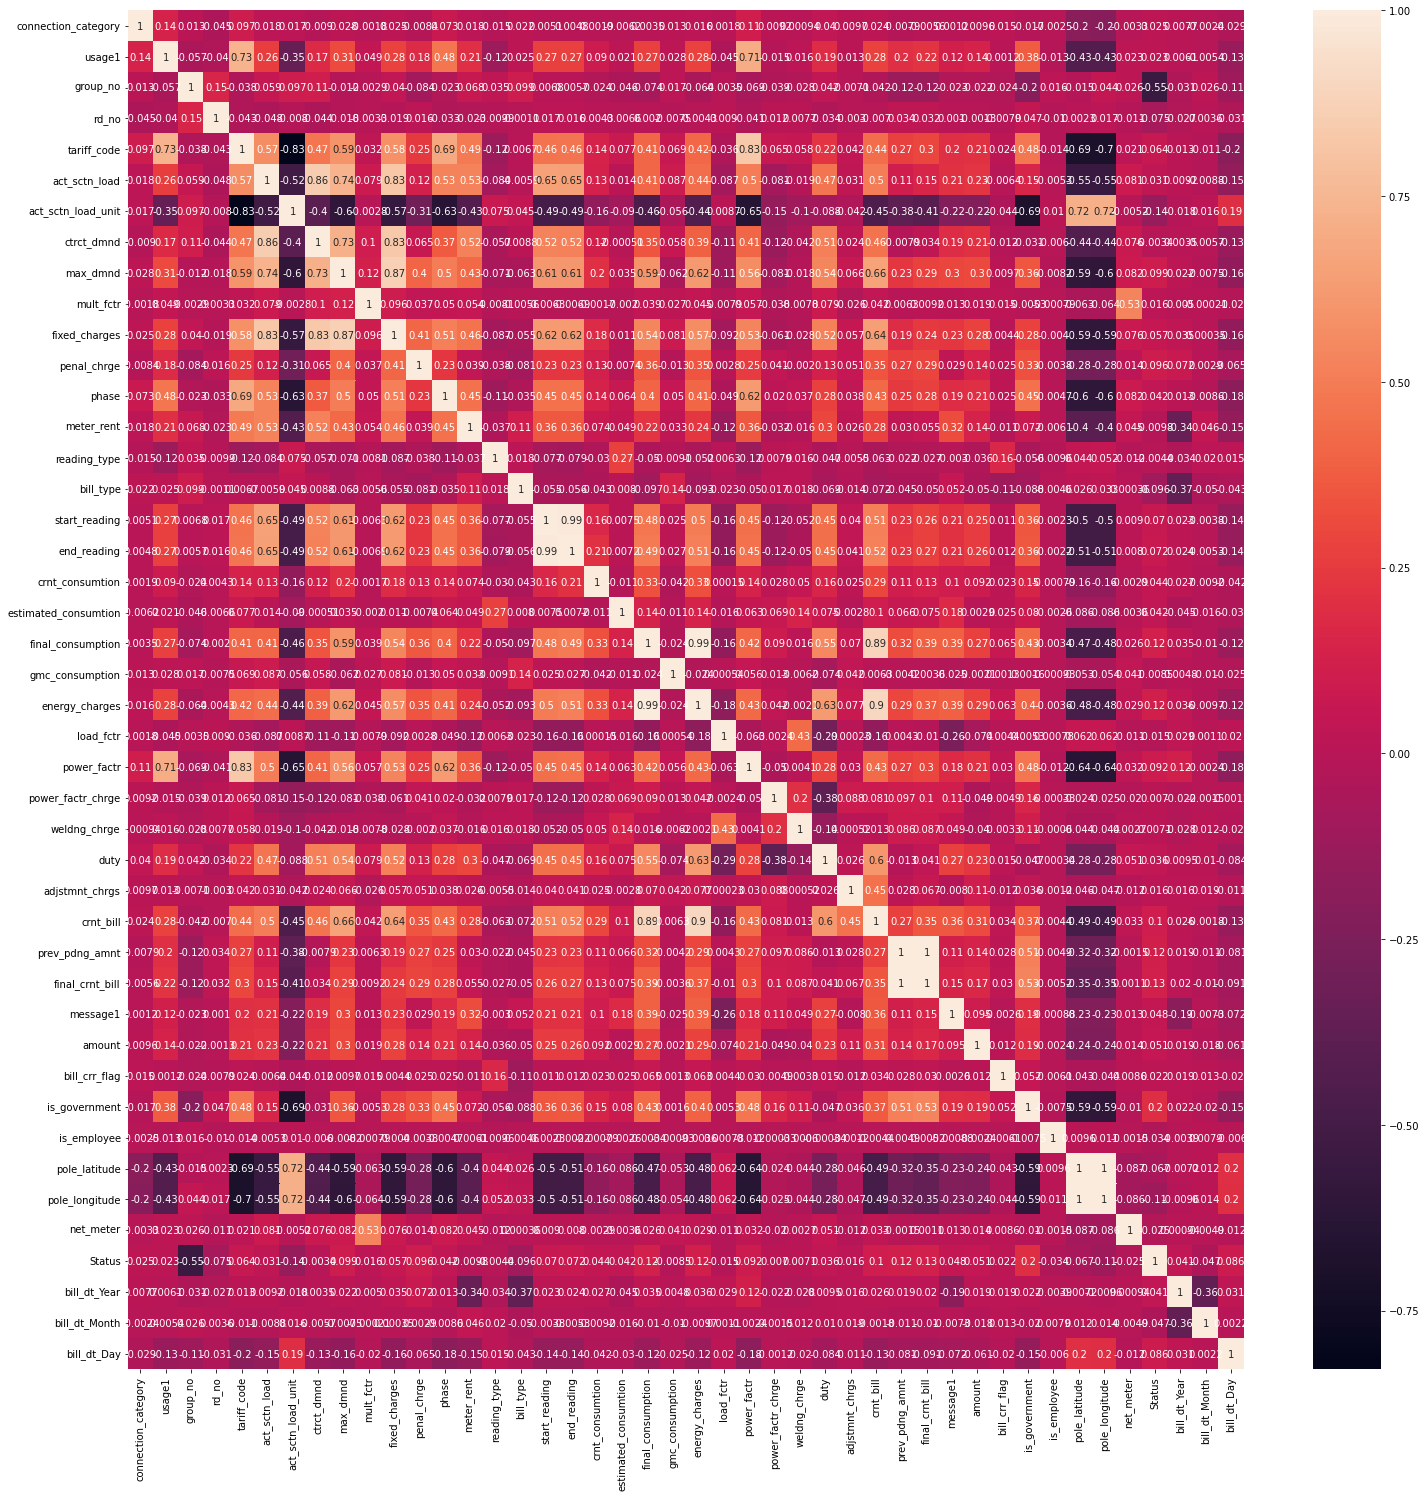

In [91]:
plt.figure(figsize=(25,25))
sns.heatmap(df1.corr(),annot=True)
plt.show()

In [92]:
df1[df1['pole_latitude'] == df1['pole_longitude']].shape

(7482, 44)

In [93]:
df1.shape

(60428, 44)

In [94]:
df1[df1['prev_pdng_amnt'] == df1['final_crnt_bill']].shape

(10, 44)

In [96]:
df1.shape

(60428, 44)

In [97]:
df1 =df1.drop(columns=['pole_latitude','pole_longitude'])

In [98]:
df1.shape

(60428, 42)

In [99]:
scaled = StandardScaler()
rescaled = scaled.fit_transform(df1)
rescaled

array([[-0.07533329, -0.47263798,  1.0527374 , ..., -1.78508484,
         0.57318703, -0.68381431],
       [-0.07533329, -0.47263798,  1.0527374 , ...,  1.04297065,
         0.2812601 ,  0.24600528],
       [-0.07533329, -0.47263798,  0.52913497, ...,  1.04297065,
        -0.01066682,  0.12977783],
       ...,
       [-0.07533329,  0.73616125,  0.35460082, ..., -1.78508484,
         0.57318703, -1.03249666],
       [-0.07533329,  2.21358253,  1.22727154, ..., -1.78508484,
         0.57318703, -1.03249666],
       [-0.07533329,  2.21358253,  0.87820325, ..., -1.78508484,
         0.57318703, -1.14872411]])

In [ ]:
X = df1.iloc[:,0:]-df1.iloc[:,42]
#Y = df1.values[:,42]
X

In [ ]:
X = array[:,0:42,43:]
Y = array[:,42]
seed = 7

kfold = KFold(n_splits=10, random_state=seed)
cart = DecisionTreeClassifier()
num_trees = 100
model = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=seed)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean()) 

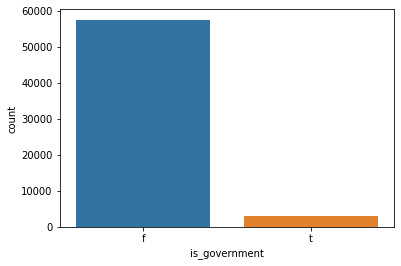

In [ ]:
sns.countplot(x=df1['is_government']);

In [ ]:
df1['is_government'].value_counts()

f    57534
t     2894
Name: is_government, dtype: int64

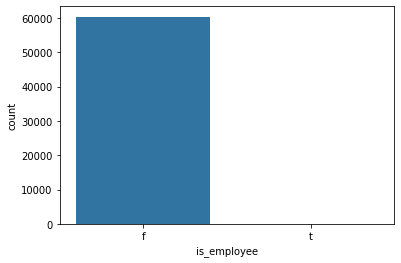

In [ ]:
sns.countplot(x= df1['is_employee'])

In [ ]:
#data['Month']= pd.to_numeric(data.Month, errors= 'coerce')
#data['Weather']=data['Weather'].astype('category')
#data['Wind']=data['Wind'].astype('int64')  